# Natural Language Processing

Almost all the data we have been working with in his course has been structured data thet we can use for analysis. We did come across some categorical data, but came across dummy variables as a way of getting round them.

Natural Language Processing (NLP) is the method of taking our unstructured text data and turning into something that can be analysed. Useful applications include:

<ul>
    <li> Sentiment analysis</li>
    <li> Recognizing key words (such as a spam filter)</li>
    <li> Building wordclouds</li>
    <li> Counting how many times a word occurs in a piece of text</li>
</ul>

Plus many more.

In this workbook we will be taking a basic introduction into NLP to see how it can be used in our analysis.

## Je ne parle pas Anglais

Or any other human language for that matter.

Think about how complicated language is, from a computational perspective. When listening, a human brain will detect a sequence of sounds and interpret them into words and phrases. When reading, the brain will recognise the symbols on a page and understand what is going on. 

A computer cannot do this. Computers do not speak any human language and this creates a problem when we want to interpret it. Our brains can analyse speech and language easily, but computers need help. A computer thinks in binary, a sequence of true or false statements (bits). A bit can only be 1 or 0, and when sequenced together can be used to convey information. 

As we saw back in module 7, Python acts as an intermediary between us and the computer, translating our code into something the computer can use and then sending it back to us. So far, all the analysis we have done has been numerical (when categorical we have used dummy variables). Natural Language Processing then is the name we give to the family of techniques of interpreting human speech into something a computer can understand.

This ranges from simply recognising words as units of data, to understanding the intricacies of speech (such as grammar, tone, intention, etc).

In this workbook we will look at how we can break up bodies of text into something computer usable. If you would like to learn more about NLP, later on there will be a chance to explore some more advanced applications. 

## Bag of Words

The first NLP technique we will look into is called <b>Bag of Words</b>, which is how we turn bodies of something computer recognizable. It works by identifying each word in a piece of text and creating a measure of how often it occurs, placing them in a 'bag' (the order doesn't matter, just what the words are and how many times they occur). 

A major application of this technique is in text classification, such as spam detection. Essentially, the theory is that we can recognise documents with similar content. So for something like spam emails, which will contain similar words, we can write a classification model (like Logistic Regression) to detect them.

Before we begin, there is a couple of terms we need to define:

<ol>
    <li><b>Document</b>- A body of text to be analyzed (i.e. a sentence, book, etc)</li>
    <li><b>Corpus</b>- A collection of documents (all the texts we are analyzing)</li>
</ol>

Let's do an example. 

Below is the opening four lines from the Scottish nursey rhyme <a href='https://www.youtube.com/watch?v=8jGurbBx6hk&ab_channel=eDewcate'>My Bonnie lies over the ocean</a>.

<ul>
    <li> My Bonnie lies over the ocean </li>
    <li> My Bonnie lies over the sea </li>
    <li> My Bonnie lies over the ocean </li>
    <li> Bring back my Bonnie to me </li>
</ul>

We can treat each line as a document within the larger corpus.

The first step in Bag of Words is to identify the individual words present (called the vocabulary).

These words are: 

<ul>
    <li> My </li>
    <li> Bonnie </li>
    <li> lies </li>
    <li> over </li>
    <li> the </li>
    <li> ocean </li>
    <li> sea </li>
    <li> bring </li>
    <li> back </li>
    <li> my </li>
    <li> to </li>
    <li> me </li>
</ul>

Our vocabulary therefore contains 12 words from a corpus of 24 words. You might notice that "My" has been listed twice, this is because one is uppercase and the other isn't. Unless otherwise stated, python will treat these as two separate words.

Next we need a method for measuring how often each word occurs. There are two methods for this- counting how many times it appears, or calculating the frequency each word appears in a document out of all the words in that document.

The simplist method would be just to count up the occurrence of each word, and place the results into a vector (list). 

For our first document, the vector would be:

<ul>
    <li> My = 1</li>
    <li> Bonnie = 1</li>
    <li> lies = 1</li>
    <li> over = 1</li>
    <li> the = 1</li>
    <li> ocean = 1</li>
    <li> sea = 0</li>
    <li> bring = 0</li>
    <li> back = 0</li>
    <li> my = 0 </li>
    <li> to = 0</li>
    <li> me = 0</li>
</ul>
    
Or [1,1,1,1,1,1,0,0,0,0,0].

The entire corpus would look like:

<ul>
    <li> My Bonnie lies over the ocean = [1,1,1,1,1,1,0,0,0,0,0,0] </li>
    <li> My Bonnie lies over the sea = [1,1,1,1,1,0,1,0,0,0,0,0]</li>
    <li> My Bonnie lies over the ocean = [1,1,1,1,1,1,0,0,0,0,0,0]</li>
    <li> Bring back my Bonnie to me = [0,1,0,0,0,0,0,1,1,1,1,1]</li>
</ul>

Notice the order the words appear in each document are not important, simply that they are there and how many times they have been counted. We can then use this output to identify the most commonly occurring word in a text, or even classify documents. For example, if we are able to identify common words used in spam emails then we use this technique to identify any future spam.

If we wanted to run new documents through this process we can, but if they contain any new words not already in the vocabularly they will not be included.

### Cleaning

The Bag of Words technique is incredibly useful, and scalable but will cause problems if not treated carefully. As we have already seen, capitalization will create repeats of words- as will spelling mistakes (or differences in regional spellings). To cope with this we can prepare the data or model in advance. For example, we can tell it to ignore uppercase or punctuation. We can ignore common words (e.g. 'and', 'the', 'of') called stopwords. There is even advanced techniques called stemming which can reduce words to their root. 

Another term you may come across is sparse matrix. If your corpus contains hundreds of words, then it is likely each vector will mostly consist of 0's. To reduce the computational power needed to analyze these, python will convert the data into a sparse matrix which requires less computational power.

# Spam, lovely spam

As an example, let's build a NLP model which will classify a document as spam or not. The dataset has been accessed from Kaggle and contains roughly 2000 emails which have been identified as spam or not. If the message is spam it is recorded as 1.

In [1]:
import pandas as pd

spam=pd.read_csv('spam_emails.csv')
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


Before we begin, you may notice each document starts with "Subject:". This will create a problem later as every document will contain that word, whether it is spam or not. Let's remove that before we go any further:

In [2]:
spam['text']=spam.text.apply(lambda x: x.replace('Subject: ',''))
spam.head()

,text,spam
0,naturally irresistible your corporate identity...,1.0
1,the stock trading gunslinger fanny is merrill...,1.0
2,unbelievable new homes made easy im wanting t...,1.0
3,4 color printing special request additional i...,1.0
4,"do not have money , get software cds from here...",1.0


We can now build a tool which will count up the frequency of each word in each document in the corpus, using an inbuilt sci-kit learn function called CountVectorizer:

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer() # we set this up like our machine learning models

cv_matrix=cv.fit_transform(spam.text) # fit the data so it can define the vocabulary and convert the text into the vectors

df_cv=pd.DataFrame( # Create a dataframe, with the columns representing the words in corpus and rows the documents
    cv_matrix.toarray(), # The data is coming from cv_matrix
    columns=cv.vocabulary_) # The words in the vocabulary go along the columns

df_cv.head()

,naturally,irresistible,your,corporate,identity,lt,is,really,hard,to,...,develoment,managemnet,cripple,vastly,parallelism,multithreading,heterogenous,itm,otm,callibration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is our entire corpus converted into vectors showing how many times each word is mentioned in each document. Before we use it in any model let's see which words are the most common.

The vectorizer does not have an inbuilt function for showing the most common words, but we can create a workaround:

In [5]:
sum_words=cv_matrix.sum(axis=0) # count up the instance of each word in the corpus and place in a matrix

top_words=pd.DataFrame(cv.vocabulary_.keys(),columns=['word']) # create a dataframe that has a row for each word

count=[] # for each word, find the corresponding count from sum_words (they are in the same order)
for i in range(len(top_words)):
    count.append(sum_words[0,i])

top_words['count']=count #create new column in dataframe

top_words.sort_values(by='count',ascending=False).head(10) # show the top 10

,word,count
22097,deepa,15291
22344,reurn,13438
2921,massand,9747
16107,waterproof,8282
24518,sheehan,7182
12014,pud,6036
9991,ignorant,5328
24531,moran,4564
12656,builds,4369
22181,teleconferences,3897


## Fine tune

So far we have built an NLP tool which takes the text as it is, but there are some ways we can make it more efficient:

<ul>
    <li><b>lowercase</b>- if set to True, will ignore all capitalizations </li>
    <li><b>stop_words</b>- removes the most common words from the given language</li>
    <li><b>ngram_range</b>- how words should be grouped (we will explore this in more detail below)</li>
    <li><b>max_df</b>- remove any words that appear in more than x% of the documents</li>
    <li><b>min_df</b>- only include words which appear in at least x% of the documents </li>
    <li><b>max_features</b>- limits how many words to include (will only include the top x words)</li>
</ul>

You can see what the stop words are by calling the vocabulary from the sklearn library:

In [6]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

It might be that from your own knowledge of the corpus that there are other words which commonly appear which you would like to be treated as stop words. To do this, create a list called `my_stop_words` which is the function above and use `.union()` to supply a list of words you would like to include. When it comes to building the vectorizer, set `stop_words=my_stop_words` so they are not included:

In [7]:
my_stop_words=text.ENGLISH_STOP_WORDS.union(['furlong'])

### ngrams

So far we have only included words on their own, but we know from the English language that words sometimes are combined. For example, "it was good" means you liked something, whereas "it was <i>not</i> good" means you didn't. In the second sentence, the "not" and "good" are combined together to give meaning.

So let's say we wanted to split "My Bonnie lies over the ocean" into bigrams (groups of 2). It would become:

<ul>
    <li> My Bonnie </li>
    <li> Bonnie lies </li>
    <li> lie over </li>
    <li> over the </li>
    <li> the ocean </li>
</ul>

We can group an many words as we would like when building a vectorizer (for example, a trigram would be a group of three words). Due to the presence of negations (i.e. "not good") it is often a good idea to include bigrams.

Let's rebuild our vectorizer with some parameters:

In [9]:
cv=CountVectorizer(
    stop_words='english',# remove the most common words from the English language
    max_df=0.9, # remove any words which appear in more than 90% of the documents
    min_df=0.05, # only include words which appear in at least 5% of the documents
    ngram_range=(1,2), # include individual words and bigrams
    lowercase=True) # ignore capitals) 

cv_matrix=cv.fit_transform(spam.text)
                        
df_cv=pd.DataFrame( 
    cv_matrix.toarray(), 
    columns=cv.vocabulary_) 

df_cv.head()

,really,company,market,information,good,website,make,world,products,business,...,enron,hou ect,ect ect,ect cc,kaminski,vince kaminski,enron com,cc subject,kaminski hou,713
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


How does this affect the top words?

In [10]:
sum_words=cv_matrix.sum(axis=0) # count up the instance of each word in the corpus and place in a matrix

top_words=pd.DataFrame(cv.vocabulary_.keys(),columns=['word']) # create a dataframe that has a row for each word

count=[] # for each word, find the corresponding count from sum_words (they are in the same order)
for i in range(len(top_words)):
    count.append(sum_words[0,i])

top_words['count']=count #create new column in dataframe

top_words.sort_values(by='count',ascending=False).head(10) # show the top 10

,word,count
81,buy,2095
75,month,1850
49,software,1682
235,cc,1458
42,order,1030
78,high,983
105,17,969
115,start,966
52,hello,915
106,director,906


## Building a model

We know have for each document what words it contains and how frequently they occur. We also know if that document is spam or not (from the original data). Combining these together, we can build a Logistic Regression model to predict if a body of text is spam based on the words it contains.

Let's first find out the baseline, what percentage of the data is spam?

In [11]:
print('Baseline: '+str(spam.spam.value_counts(normalize=True).max()))

Baseline: 0.6696035242290749


This is the value we are trying to beat.

Before we begin building the model though, we will need to create a training and testing dataset. To do this we will need to rebuild our CountVectorizer so it only looks at the words in the training set.

In [12]:
from sklearn.model_selection import train_test_split

X=spam[['text']]
y=spam.spam

X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(X, y, stratify=y, train_size=0.8)

In [14]:
cv=CountVectorizer(
    stop_words='english',
    max_df=0.9, 
    min_df=0.05,
    ngram_range=(1,2), 
    lowercase=True)

X_train_cv=cv.fit_transform(X_traincv.text)
X_test_cv=cv.transform(X_testcv.text)
                        
X_train_cvdf=pd.DataFrame( 
    X_train_cv.toarray(), 
    columns=cv.vocabulary_) 

X_test_cvdf=pd.DataFrame( 
    X_test_cv.toarray(), 
    columns=cv.vocabulary_) 

In [15]:
from sklearn.linear_model import LogisticRegression

logregcv=LogisticRegression()
logregcv.fit(X_train_cvdf,y_traincv)

LogisticRegression()

In [16]:
print('Train score: '+ str(logregcv.score(X_train_cvdf,y_traincv)))
print('Test score: '+ str(logregcv.score(X_test_cvdf,y_testcv)))
print('Baseline: '+str(spam.spam.value_counts(normalize=True).max()))

Train score: 0.9944920440636474
Test score: 0.9779951100244498
Baseline: 0.6696035242290749


It appears the model we have built is very good at identifying spam emails based on the words they contain. Using the output from this model, we can see which words it thought were the most useful in identifying spam:

,Effect Size
based,1.506484
access,1.247891
thanks,1.227192
day,1.154196
using,1.074581
...,...
use,-1.500109
request,-1.818363
link,-2.119209
looking,-2.203735


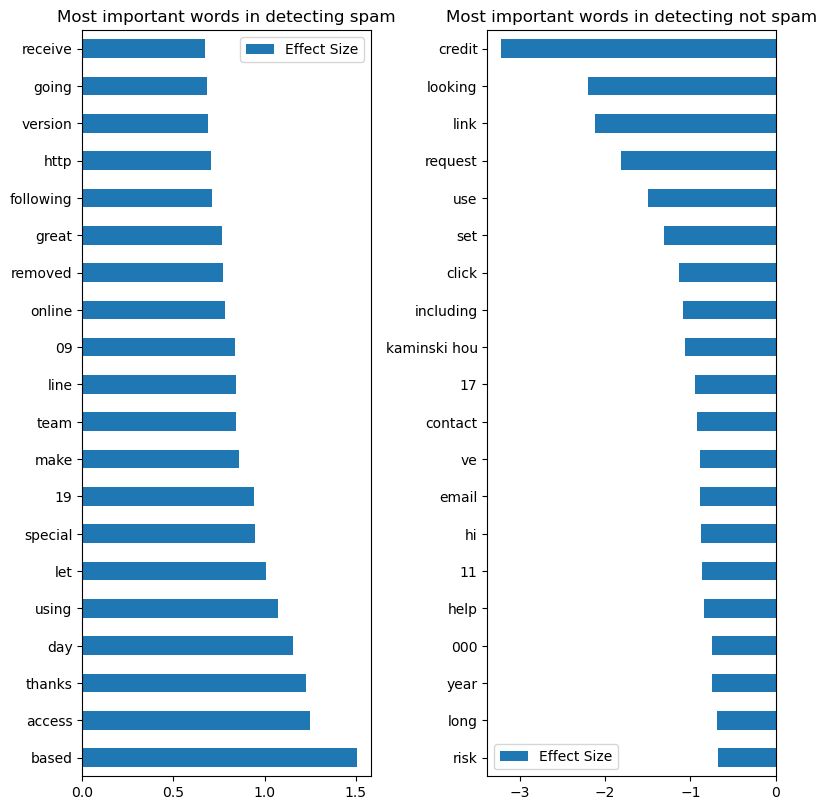

In [18]:
import matplotlib.pyplot as plt

effect_df=pd.DataFrame(logregcv.coef_[0],index=X_train_cvdf.columns,columns=['Effect Size'])
display(effect_df.sort_values(by='Effect Size',ascending=False))

fig, ax = plt.subplots(ncols=2,figsize=(8,8))
effect_df.sort_values(by='Effect Size',ascending=False).head(20).plot(kind='barh',ax=ax[0])
effect_df.sort_values(by='Effect Size',ascending=False).tail(20).plot(kind='barh',ax=ax[1])
fig.tight_layout()
ax[0].set_title('Most important words in detecting spam')
ax[1].set_title('Most important words in detecting not spam')
plt.show()

You can see on the left the words which the model saw as most important in detecting spam (anyone surprised to see viagra there?). On the right are the words least important in detecting spam.

Congratulations! You have built a tool using natural language processing!

## Practice

Trip Advisor allows users to review tourist attractions, hotels and other holiday related activities. Users are able to provide a star rating as well as leave a comment. Your line manager is interested in what the most common words are in bad reviews, so they can advise on what attractions should focus on if they want to improve.

Using CountVectorizer, build a Logistic Regression model that will classify a review as 'good' (4 or 5 stars) or 'not good' (1, 2 or 3) stars. Return the words which were most important in predicting if a review was 'good'.

In [19]:
trip_data=pd.read_csv('tripadvisor_hotel_reviews.csv')

trip_data['target']=trip_data.Rating.apply(lambda x: 1 if x in [4,5] else 0) #create target 

trip_data.head()

,Review,Rating,target
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [20]:
X_ta=trip_data[['Review']]
y_ta=trip_data.target

X_trainta, X_testta, y_trainta, y_testta = train_test_split(X_ta, y_ta, stratify=y_ta, train_size=0.8)

In [22]:
cvta=CountVectorizer(
    stop_words='english',
    max_df=0.9, 
    min_df=0.05,
    ngram_range=(1,2), 
    lowercase=True)

X_train_cvta=cvta.fit_transform(X_trainta.Review)
X_test_cvta=cvta.transform(X_testta.Review)
                        
X_train_dfta=pd.DataFrame( 
    X_train_cvta.toarray(), 
    columns=cvta.vocabulary_) 

X_test_dfta=pd.DataFrame( 
    X_test_cvta.toarray(), 
    columns=cvta.vocabulary_) 

In [24]:
logregta=LogisticRegression(max_iter = 100000)
logregta.fit(X_train_dfta,y_trainta)

LogisticRegression(max_iter=100000)

In [25]:
print('Train score: '+ str(logregta.score(X_train_dfta,y_trainta)))
print('Test score: '+ str(logregta.score(X_test_dfta,y_testta)))
print('Baseline: '+str(trip_data.target.value_counts(normalize=True).max()))

Train score: 0.8748169838945827
Test score: 0.8587460356184435
Baseline: 0.7365672734371187


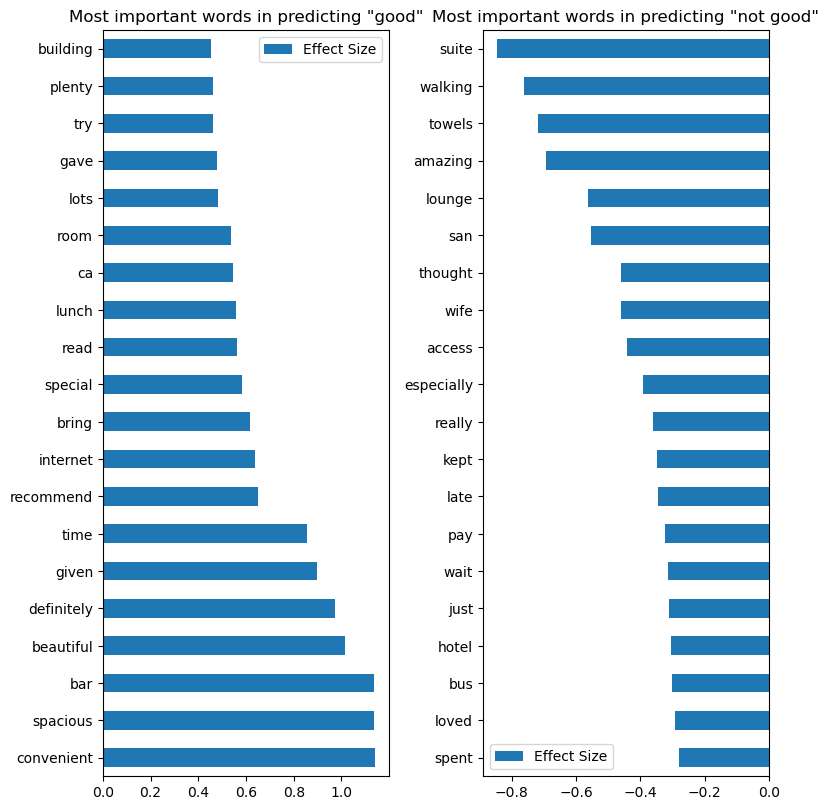

In [28]:
effect_df=pd.DataFrame(logregta.coef_[0],index=X_train_dfta.columns,columns=['Effect Size'])

fig, ax = plt.subplots(ncols=2,figsize=(8,8))
effect_df.sort_values(by='Effect Size',ascending=False).head(20).plot(kind='barh',ax=ax[0])
effect_df.sort_values(by='Effect Size',ascending=False).tail(20).plot(kind='barh',ax=ax[1])
fig.tight_layout()
ax[0].set_title('Most important words in predicting "good"')
ax[1].set_title('Most important words in predicting "not good"')
plt.show()

## Term Frequency-Inverse Document Frequency (TF-IDF)

In the previous example we used CountVectorizer to turn our documents into vectors so they can be passed into a machine learning model. The process it followed was to simply count up how many times each word within the corpus vocabulary appeared in each document.

But this is not the only way of doing it.

TF-IDF instead calculates how relevant a word is to a document within the corpus. Each word within each document is assigned a score based on how many times it appears in <i>that document</i> against how many <i>other documents</i> it appears in. The more rare a word is, the higher the TF-IDF score. A common application for this is search engines that look for words most similar to what you are searching for.

Let's do an example with a different Scottish nursery rhyme, <a href='https://www.youtube.com/watch?v=QSmgoxIWTzA&ab_channel=ThorEwing'> Three Craws sat upon a wa’</a>:

<ul>
    <li> Three craws sat upon a wa’ </li>
    <li> Sat upon a wa’, sat upon a wa’ </li>
    <li> Three craws sat upon a wa’ </li>
    <li> On a cauld and frosty mornin’ </li>
</ul>

To start we need to calculate for each word the <b>Term Frequency</b> which is how many times a word appears in each document (i.e. what CountVectorizer does). For our corpus, we would get the following:

<table>
    <tr>
        <th> Words </th>
        <th> Line 1 </th>
        <th> Line 2 </th>
        <th> Line 3 </th>
        <th> Line 4 </th>
    </tr>
    <tr>
        <th> three </th>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> craws </th>
        <td> 1 </td>
        <td> 0 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> sat </th>
        <td> 1 </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> upon </th>
        <td> 1 </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> wa </th>
        <td> 1 </td>
        <td> 2 </td>
        <td> 1 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> cauld </th>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <th> frosty </th>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1 </td>
    </tr>
    <tr>
        <th> mornin </th>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1 </td>
    </tr>
</table>

(For simplicity we will treat all words within the vocabulary as lowercase, ignore punctuation and any stop words)

This table shows the TF (Term-Frequency) part of the process, the <b>IDF</b> (Inverse Document Frequency) is where we assign a score based on how often a word occurs (rarer words gain higher scores).

The formula for calculating this is:

<p style=font-size:18pt;display:true;text-align:center>$IDF$ = $ln($$\frac{Total\ number\ of\ documents\  +\  1}{Number\ of\ documents\ containing\ that\ word\ +\ 1}$$)$+1</p> 

In other words, for each word we divide the total number of documents (+1) and divide by the number of documents that contain that word (+1) and take the natural logarithm of the result, and then +1 (don't worry sklearn will do all this for us). 

Applying this to our vocabulary, we would get:

<table>
    <tr>
        <th> Word </th>
        <th> IDF </th>
    </tr>
    <tr>
        <th> three </th>
        <td> 1.51 </td>
    </tr>
    <tr>
        <th> craws </th>
        <td> 1.51 </td>
    </tr>
    <tr>
        <th> sat </th>
        <td> 1.22 </td>
    </tr>
    <tr>
        <th> upon </th>
        <td> 1.22 </td>
    </tr>
    <tr>
        <th> wa </th>
        <td> 1.22 </td>
    </tr>
    <tr>
        <th> cauld </th>
        <td> 1.92 </td>
    </tr>
    <tr>
        <th> frosty </th>
        <td> 1.92 </td>
    </tr>
    <tr>
        <th> mornin </th>
        <td> 1.92 </td>
    </tr>
</table>

(As an example, "three" gets a score of 1.52 because it appears in 2 out of 4 documents, giving the formula $ln($$\frac{4\ + \ 1}{2\ +\ 1}$$)$+1.

To get the <b>TF-IDF</b> score for each word in each document, we simply multiply the TF (how often a word occurs) by the IDF (how rare it is). The higher scoring the word, the more important it is to that document:

<table>
    <tr>
        <th> Words </th>
        <th> Line 1 </th>
        <th> Line 2 </th>
        <th> Line 3 </th>
        <th> Line 4 </th>
    </tr>
    <tr>
        <th> three </th>
        <td> 1.51 </td>
        <td> 0 </td>
        <td> 1.51 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> craws </th>
        <td> 1.51 </td>
        <td> 0 </td>
        <td> 1.51 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> sat </th>
        <td> 1.22 </td>
        <td> 2.44 </td>
        <td> 1.22 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> upon </th>
        <td> 1.22 </td>
        <td> 2.44 </td>
        <td> 1.22 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> wa </th>
        <td> 1.22 </td>
        <td> 2.44 </td>
        <td> 1.22 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <th> cauld </th>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1.92 </td>
    </tr>
    <tr>
        <th> frosty </th>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1.92 </td>
    </tr>
    <tr>
        <th> mornin </th>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 1.92 </td>
    </tr>
</table>

Now each document is a vector containing TF-IDF scores which show how important each word is to a document. Going back to our spam example, we can use this as part of a detector as words which appear in a lot of spam emails will be given similar scores which can be used in a classification model.

## Spam and (eggs)ample

Let's rebuild our spam detector using TF-IDF instead of CountVectorizer:

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF has the same parameter inputs as CountVectorizer
tfidf = TfidfVectorizer( 
    stop_words='english',
    max_df=0.9, 
    min_df=0.05,
    ngram_range=(1,2), 
    lowercase=True,
    norm=None) # by default, this function uses a different technique to what was demonstrated, set to None to use same formulas

Now we have the vectorizer set up, we can supply the corpus and transform the data.

In [31]:
tfidf_matrix = tfidf.fit_transform(spam['text']) # convert corpus into vectors with TF-IDF values

df_tfidf=pd.DataFrame( # create dataframe to display output
    tfidf_matrix.toarray(), 
    columns=tfidf.vocabulary_) 

df_tfidf.head()

,really,company,market,information,good,website,make,world,products,business,...,enron,hou ect,ect ect,ect cc,kaminski,vince kaminski,enron com,cc subject,kaminski hou,713
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.413127,0.0,0.0,0.0,0.0,3.625452,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.206564,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Now we have created a different matrix from before for assigning value to words within the vocabulary for our Bag of Words approach. Like before, there is no inbuilt function for seeing the scores for each word, but we can write our own code which extracts this information which we can put into a dataframe:

In [33]:
scores=dict(zip(tfidf.vocabulary_, tfidf_matrix.toarray()[0]))

scores_df=pd.DataFrame(scores.values(),index=scores.keys(),columns=['TF-IDF'])

scores_df.sort_values(by='TF-IDF',ascending=False).head(10)

,TF-IDF
hello,8.776711
receive,7.057828
internet,6.689099
hou ect,6.413127
number,6.033724
site,5.349258
order,5.103852
financial,3.904165
simply,3.877732
12,3.835172


The word "company" has the highest score, showing it is the rarest word used within this corpus. To 

### Build a model

We can now rebuild our spam detector, using the TF-IDF approach.

First we need to create our train and test set for the model:

In [34]:
X=spam[['text']]
y=spam.spam

X_traintf, X_testtf, y_traintf, y_testtf = train_test_split(X, y, stratify=y, train_size=0.8)

tfidf = TfidfVectorizer( 
    stop_words='english',
    max_df=0.9, 
    min_df=0.05,
    ngram_range=(1,2), 
    lowercase=True,
    norm=None)

X_train_tfidf=tfidf.fit_transform(X_traintf.text)
X_test_tfidf=tfidf.transform(X_testtf.text)
                        
X_train_idf=pd.DataFrame( 
    X_train_tfidf.toarray(), 
    columns=tfidf.vocabulary_) 

X_test_idf=pd.DataFrame( 
    X_test_tfidf.toarray(), 
    columns=tfidf.vocabulary_) 

Now we can build a Logistic Regression model to check if a document is spam based on the TF-IDF scores:

In [35]:
logreg_tfidf=LogisticRegression()
logreg_tfidf.fit(X_train_idf,y_traintf)

LogisticRegression()

Let's now check how well the model performed:

In [36]:
print('Train score: '+ str(logreg_tfidf.score(X_train_idf,y_traintf)))
print('Test score: '+ str(logreg_tfidf.score(X_test_idf,y_testtf)))
print('Baseline: '+str(trip_data.target.value_counts(normalize=True).max()))

Train score: 0.9987760097919217
Test score: 0.9657701711491442
Baseline: 0.7365672734371187


Again, pretty good. We have a second model for detecting spam. 

But what words or phrases did the model think were most important in making predictions?

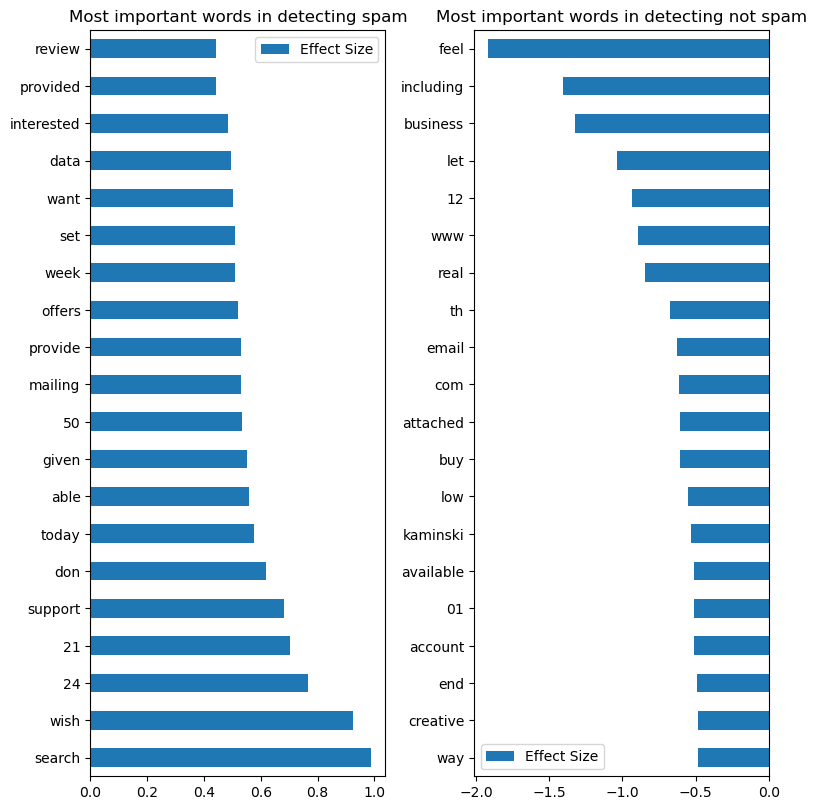

In [37]:
effect_df=pd.DataFrame(logreg_tfidf.coef_[0],index=X_train_idf.columns,columns=['Effect Size'])

fig, ax = plt.subplots(ncols=2,figsize=(8,8))
effect_df.sort_values(by='Effect Size',ascending=False).head(20).plot(kind='barh',ax=ax[0])
effect_df.sort_values(by='Effect Size',ascending=False).tail(20).plot(kind='barh',ax=ax[1])
fig.tight_layout()
ax[0].set_title('Most important words in detecting spam')
ax[1].set_title('Most important words in detecting not spam')
plt.show()

The question now is, which approach is best to use when building classification models?

It depends. CountVectorizer is more appropriate when you are searching by <i>how often a word occurs</i>, whereas TF-IDF is for when you are searching by keywords. 

Like with any model building process though, you should try both options and see which gives you the best result. Let's compare the scores for both approaches (using the same parameters):


In [38]:
scores_comp=pd.DataFrame({
    'Approach':['Baseline','CountVectorizer','TF-IDF'],
    'Train':[trip_data.target.value_counts(normalize=True).max(),logregcv.score(X_train_cvdf,y_traincv),logreg_tfidf.score(X_train_idf,y_traintf)],
    'Test':[trip_data.target.value_counts(normalize=True).max(),logregcv.score(X_test_cvdf,y_testcv),logreg_tfidf.score(X_test_idf,y_testtf)]
})

scores_comp

,Approach,Train,Test
0,Baseline,0.736567,0.736567
1,CountVectorizer,0.994492,0.977995
2,TF-IDF,0.998776,0.965770


In this case they perform about the same when it comes to spam detection:

## Practice

Rebuild your good review predictor using TF-IDF and report which words or phrases were most important in making that prediction. 

In [39]:
X_ta=trip_data[['Review']]
y_ta=trip_data.target

X_trainta, X_testta, y_trainta, y_testta = train_test_split(X_ta, y_ta, stratify=y_ta, train_size=0.8)

In [40]:
tfidfta=TfidfVectorizer(
    stop_words='english',
    max_df=0.9, 
    min_df=0.05,
    ngram_range=(1,2), 
    lowercase=True,
    norm=None)

X_train_tfta=tfidfta.fit_transform(X_trainta.Review)
X_test_tfta=tfidfta.transform(X_testta.Review)
                        
X_train_dfta=pd.DataFrame( 
    X_train_tfta.toarray(), 
    columns=tfidfta.vocabulary_) 

X_test_dfta=pd.DataFrame( 
    X_test_tfta.toarray(), 
    columns=tfidfta.vocabulary_) 

In [41]:
logregtfta=LogisticRegression()
logregtfta.fit(X_train_dfta,y_trainta)

LogisticRegression()

In [42]:
print('Train score: '+ str(logregtfta.score(X_train_dfta,y_trainta)))
print('Test score: '+ str(logregtfta.score(X_test_dfta,y_testta)))
print('Baseline: '+str(trip_data.target.value_counts(normalize=True).max()))

Train score: 0.8724987798926306
Test score: 0.8704562088314223
Baseline: 0.7365672734371187


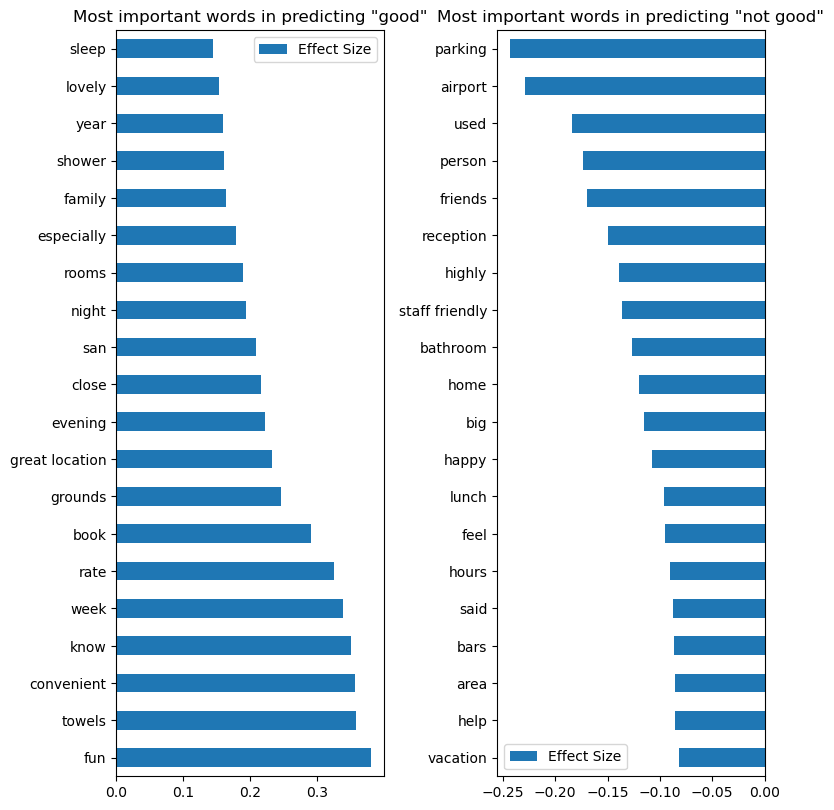

In [43]:
effect_df=pd.DataFrame(logregtfta.coef_[0],index=X_train_dfta.columns,columns=['Effect Size'])

fig, ax = plt.subplots(ncols=2,figsize=(8,8))
effect_df.sort_values(by='Effect Size',ascending=False).head(20).plot(kind='barh',ax=ax[0])
effect_df.sort_values(by='Effect Size',ascending=False).tail(20).plot(kind='barh',ax=ax[1])
fig.tight_layout()
ax[0].set_title('Most important words in predicting "good"')
ax[1].set_title('Most important words in predicting "not good"')
plt.show()